In [15]:
import pandas as pd
import numpy as np

def concatenate_files(file_path1, file_path2, output_path, sep=','):

    df1 = pd.read_csv(file_path1, sep=sep)
    df2 = pd.read_csv(file_path2, sep=sep)

    # Assuming df1 has at least one column (Batch Number) and df2 has at least two columns
    # Extract the second column from df2 (Note: Python uses zero-based indexing)
    second_column = df2.iloc[:, 1]  # Adjust the index if needed
    
    # Name the second column for clarity in the output file
    second_column.name = 'RMSE'

    # Combine the columns
    output_df = pd.DataFrame({
        'Batch_Number': df1.iloc[:, 0],  # Assuming the first column in df1 is Batch Number
        'Detection_Score': df1.iloc[:, 1],  # Assuming the second column in df1 is Detection Score
        'RMSE': second_column
    })

    # Write the DataFrame to a new text file
    output_df.to_csv(output_path, index=False, sep=sep)

    print(f"Concatenated file saved to {output_path}")




# Video Paths
video_res1="/home/woody/iwso/iwso122h/Calf_Detection/new_img_data/graphs/06_Nov_confidence_scores.txt"
# video_res2=
# video_res3=
# video_res4=

# Audio Paths
audio_res1="/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/misc_3/06_Nov_rmse_values.txt"



# Combined Paths
multi_moda1_1="/home/woody/iwso/iwso122h/Calf_Detection/Ploting/06_Nov_Multi_Modal.txt"




concatenate_files(video_res1, audio_res1, multi_moda1_1)


Concatenated file saved to /home/woody/iwso/iwso122h/Calf_Detection/Ploting/06_Nov_Multi_Modal.txt


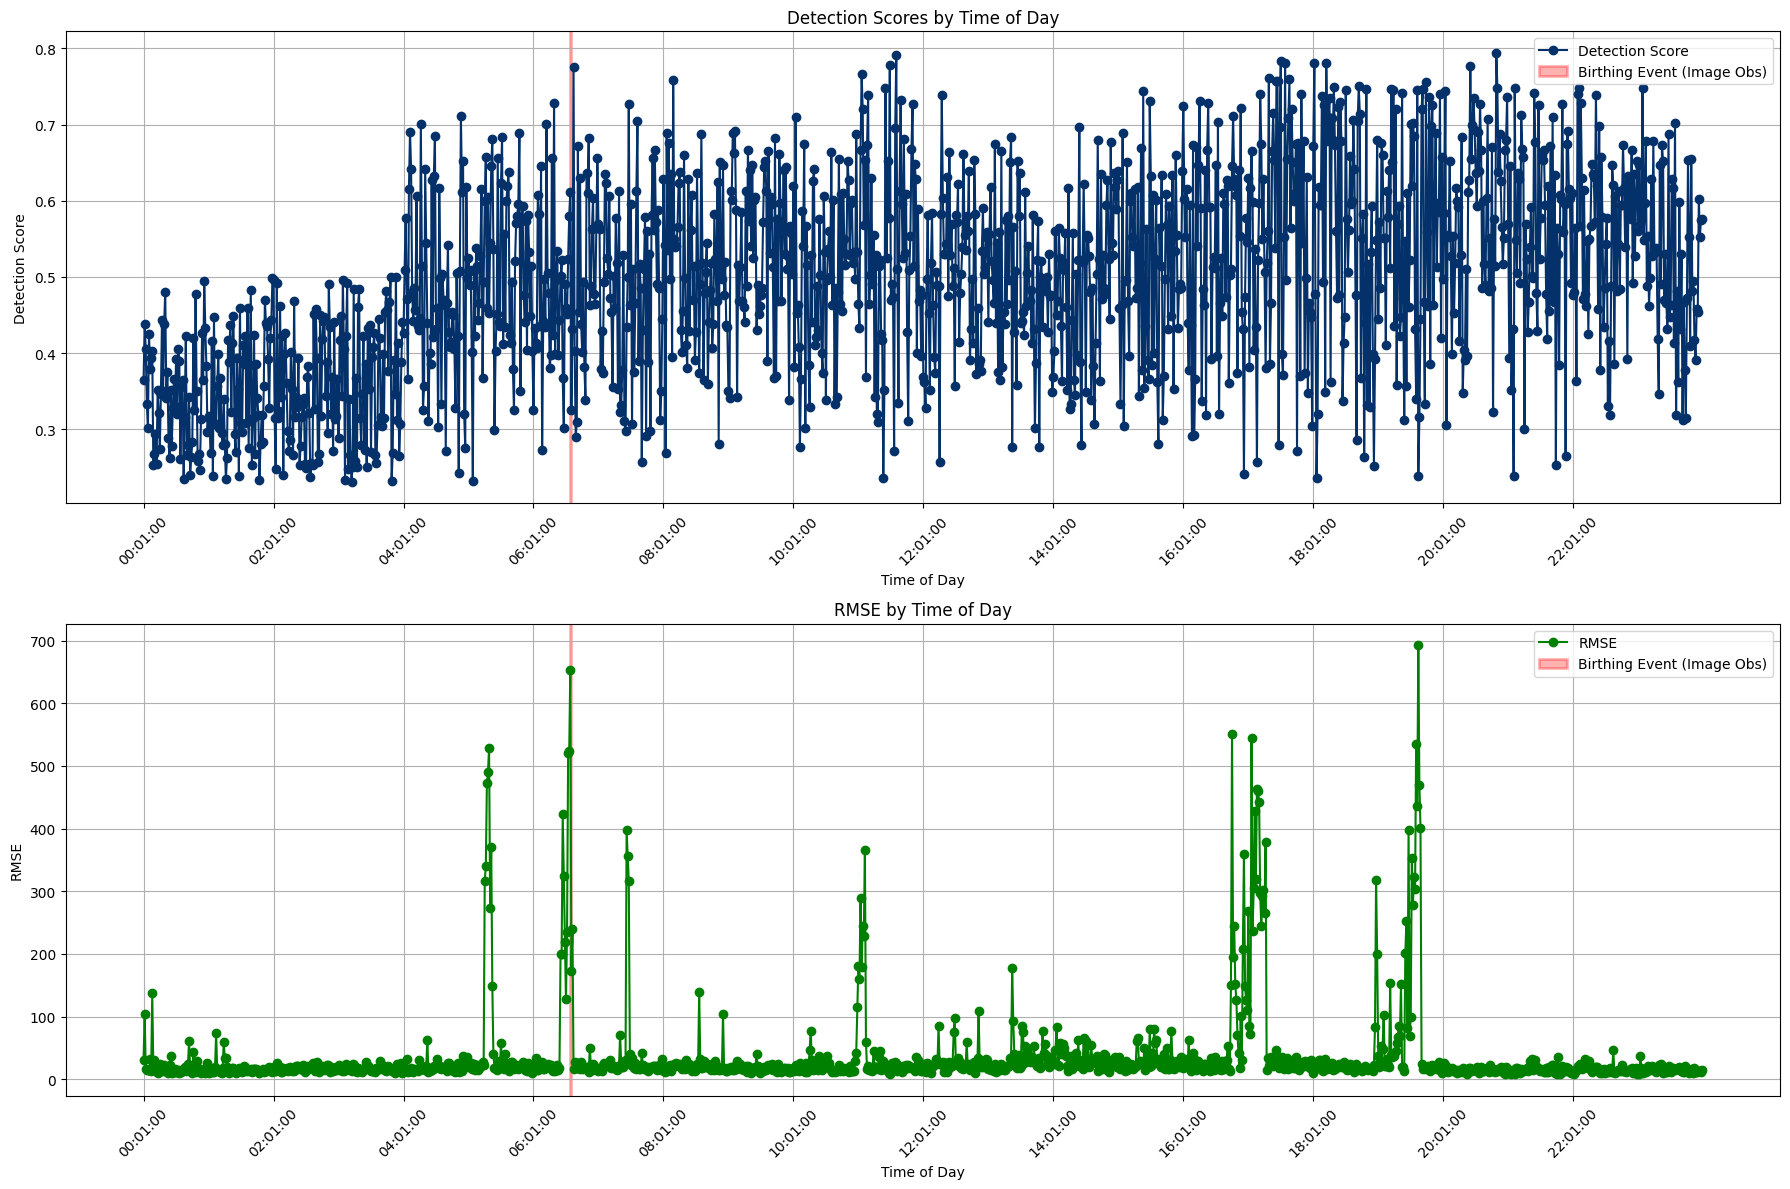

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os

def convert_batches_to_time(batch_numbers):
    base_time = datetime.strptime("00:00:00", "%H:%M:%S")
    time_labels = [base_time + timedelta(minutes=int(batch)) for batch in batch_numbers]
    formatted_labels = [time.strftime('%H:%M:%S') for time in time_labels]
    return formatted_labels

def read_data_from_file(txt_filepath):
    df = pd.read_csv(txt_filepath)
    return df['Batch_Number'], df['Detection_Score'], df['RMSE']

def plot_combined_metrics(txt_filepath, output_img_path, batch_ranges):
    batch_numbers, detection_scores, rmse_values = read_data_from_file(txt_filepath)
    time_labels = convert_batches_to_time(batch_numbers)

    fig, axs = plt.subplots(2, 1, figsize=(18, 12))  # 2 rows, 1 column subplot

    # Plot Detection Score
    axs[0].plot(time_labels, detection_scores, marker='o', linestyle='-', color='#04316A', label='Detection Score')
    axs[0].set_title('Detection Scores by Time of Day')
    axs[0].set_xlabel('Time of Day')
    axs[0].set_ylabel('Detection Score')
    axs[0].grid(True)

    # Plot RMSE
    axs[1].plot(time_labels, rmse_values, marker='o', linestyle='-', color='green', label='RMSE')
    axs[1].set_title('RMSE by Time of Day')
    axs[1].set_xlabel('Time of Day')
    axs[1].set_ylabel('RMSE')
    axs[1].grid(True)

    for ax in axs:
        tick_spacing = 120  # Every 120 minutes
        ticks = time_labels[::tick_spacing]
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks, rotation=45)

        for start, end, title, color in batch_ranges:
            start_time_label = time_labels[start]
            end_time_label = time_labels[end]
            start_index = time_labels.index(start_time_label)
            end_index = time_labels.index(end_time_label)
            
            rect = patches.Rectangle((start_index, ax.get_ylim()[0]), end_index - start_index, ax.get_ylim()[1] - ax.get_ylim()[0], linewidth=2, edgecolor=color, facecolor=color, alpha=0.3, label=title)
            ax.add_patch(rect)
        
        ax.legend()

    plt.tight_layout()
    plt.savefig(output_img_path)
    plt.show()

# Example usage
date = '09_Oct'
size = "normal"
evaluation_directory = '/home/woody/iwso/iwso122h/Calf_Detection/Ploting/'

txt_filepath = os.path.join(evaluation_directory, f"{date}_Multi_Modal_D2.txt")
output_img_path = os.path.join(evaluation_directory, f"{date}_{size}_combined_metrics.png")

batch_ranges = [[394, 395, "Birthing Event (Image Obs)",'red']]
#Image paths

plot_combined_metrics(txt_filepath, output_img_path, batch_ranges)


In [ ]:
import os
import re
from typing import Set

def extract_unique_dates(directory_path: str) -> Set[str]:
    unique_dates = set()
    date_pattern = re.compile(r'^(\d{4}-\d{2}-\d{2})')  # Regex to match the date at the beginning of the filename

    # Traverse the directory and get all files
    for filename in os.listdir(directory_path):
        match = date_pattern.match(filename)
        if match:
            unique_dates.add(match.group(1))  # Add the matched date to the set

    return unique_dates


directory_path = "/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/train"
if not os.path.exists(directory_path):
    print("The directory does not exist.")


if not os.path.isdir(directory_path):
    print("The provided path is not a directory.")

unique_dates = extract_unique_dates(directory_path)
for date in sorted(unique_dates):
    print(date)


